In [1]:
import config
import os
import numpy as np
import matplotlib.pyplot as plt
from statistics import NormalDist
from scipy import integrate,stats
import pandas as pd
import run_scan
from return_gene_descriptions import return_gene_descriptions
import figure_utils as fu

SMALL_SIZE=18
MEDIUM_SIZE = 25
BIGGER_SIZE = 40

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('xtick.major', size=3.5*SMALL_SIZE)
plt.rc('xtick.major', size=.4*SMALL_SIZE)

plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [2]:
config.good_species

['Akkermansia_muciniphila_55290',
 'Alistipes_finegoldii_56071',
 'Alistipes_onderdonkii_55464',
 'Alistipes_shahii_62199',
 'Bacteroides_caccae_53434',
 'Bacteroides_cellulosilyticus_58046',
 'Bacteroides_coprocola_61586',
 'Bacteroides_eggerthii_54457',
 'Bacteroides_fragilis_54507',
 'Bacteroides_ovatus_58035',
 'Bacteroides_plebeius_61623',
 'Bacteroides_stercoris_56735',
 'Bacteroides_thetaiotaomicron_56941',
 'Bacteroides_vulgatus_57955',
 'Barnesiella_intestinihominis_62208',
 'Coprococcus_sp_62244',
 'Dialister_invisus_61905',
 'Eubacterium_eligens_61678',
 'Eubacterium_rectale_56927',
 'Eubacterium_siraeum_57634',
 'Faecalibacterium_prausnitzii_61481',
 'Odoribacter_splanchnicus_62174',
 'Oscillibacter_sp_60799',
 'Parabacteroides_distasonis_56985',
 'Parabacteroides_merdae_56972',
 'Prevotella_copri_61740',
 'Roseburia_intestinalis_56239',
 'Roseburia_inulinivorans_61943',
 'Ruminococcus_bicirculans_59300',
 'Ruminococcus_bromii_62047']

In [29]:
species = 'Bacteroides_vulgatus_57955'

df = pd.read_csv(f"scans/HMP/{species}/{species}_full_scan.txt",index_col=[0,1,2,3,4])

params = pd.read_csv(f"scans/HMP/{species}/{species}_scan_params.txt",index_col=0)

ws = int(params.loc["window_size"])

In [131]:
LG = pd.read_csv("TableS3.csv",index_col=1)

In [132]:
LG

,Unnamed: 0,Sample 1,Sample 2,Clonal divergence,Clonal fraction,between clade?,Shown in Fig3?,Transfer divergence (synonymous),Transfer divergence,Core genome start loc,Core genome end loc,Transfer length (# covered sites on core genome),Reference contig,Reference genome start loc,Reference genome end loc,Potential duplicate of other events?
Species name,,,,,,,,,,,,,,,,
Bacteroides_vulgatus_57955,0,700013715,700037042,0.000078,0.695308,Y,False,0.107143,0.030151,30553,35844,3980,NC_009614,79144,84525,True
Bacteroides_vulgatus_57955,1,700013715,700037042,0.000078,0.695308,N,False,0.004762,0.001445,42741,64082,20074,NC_009614,106184,132379,True
Bacteroides_vulgatus_57955,2,700013715,700037042,0.000078,0.695308,Y,False,0.066667,0.016936,64889,66188,1299,NC_009614,133186,134727,True
Bacteroides_vulgatus_57955,3,700013715,700037042,0.000078,0.695308,N,False,0.007092,0.002168,81155,107324,10147,NC_009614,213781,262944,True
Bacteroides_vulgatus_57955,4,700013715,700037042,0.000078,0.695308,N,False,0.004386,0.001832,169371,260199,74786,NC_009614,370286,542443,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Akkermansia_muciniphila_55290,49,ERR912157,ERR912189,0.000108,0.766120,NaN,True,0.072222,0.026926,1529207,1533922,4271,NC_010655,2459125,2464740,False
Akkermansia_muciniphila_55290,50,ERR912157,ERR912189,0.000108,0.766120,NaN,True,0.029752,0.012921,1536302,1550404,13312,NC_010655,2467223,2490083,True
Akkermansia_muciniphila_55290,51,ERR912157,ERR912189,0.000108,0.766120,NaN,True,0.076596,0.028592,1565155,1571290,5456,NC_010655,2516101,2523218,True


In [133]:
(35844 - 30553)

5291

In [134]:
(84525 - 79144)

5381

In [135]:
LG = LG.loc[LG["Potential duplicate of other events?"] == False]

In [136]:
LG = LG.loc[species]

In [137]:
LG = LG.loc[LG["between clade?"] == "N"]

In [140]:
2057665/5162846

0.3985524650551266

In [143]:
LG.max()

Unnamed: 0                                                        33
Sample 1                                                   SRR413666
Sample 2                                            mickey3-11-30-0_
Clonal divergence                                           0.000109
Clonal fraction                                             0.997873
between clade?                                                     N
Shown in Fig3?                                                  True
Transfer divergence (synonymous)                            0.065815
Transfer divergence                                         0.022934
Core genome start loc                                        2048032
Core genome end loc                                          2057665
Transfer length (# covered sites on core genome)              245960
Reference contig                                           NC_009614
Reference genome start loc                                   5117883
Reference genome end loc          

In [157]:
i = 0

#sp = df.index.get_level_values("site_pos")

sp = np.arange(sp.min(),sp.max(),int(1e3))

sp[i],sp[i+ws]

(85679.0, 385679.0)

In [158]:
ws = 100

In [159]:
num_transfers = {}
for i in range(len(sp)):
    
    if i + ws < len(sp):
        n = ((LG["Reference genome start loc"] >= sp[i])&(LG["Reference genome start loc"] < sp[i + ws])).sum()
        num_transfers[(sp[i],sp[i+ws])] = n
    else:
        n = ((LG["Reference genome start loc"] >= sp[i])&(LG["Reference genome start loc"] < sp[-1])).sum()
        num_transfers[(sp[i],sp[-1])] = n

In [160]:
num_transfers = pd.Series(num_transfers)
num_transfers.index.names = ["start","end"]

# pass_idxs=np.argwhere(df["significance"]).ravel()
# fail_idxs=~np.argwhere(df["significance"]).ravel()
# num_transfers_pass = num_transfers.iloc[pass_idxs]
# num_transfers_fail = num_transfers.iloc[fail_idxs]


In [161]:
midpoints = num_transfers.index.get_level_values("start") + (num_transfers.index.get_level_values("end") - num_transfers.index.get_level_values("start"))/2

In [162]:
midpoints = num_transfers.index.get_level_values("start")

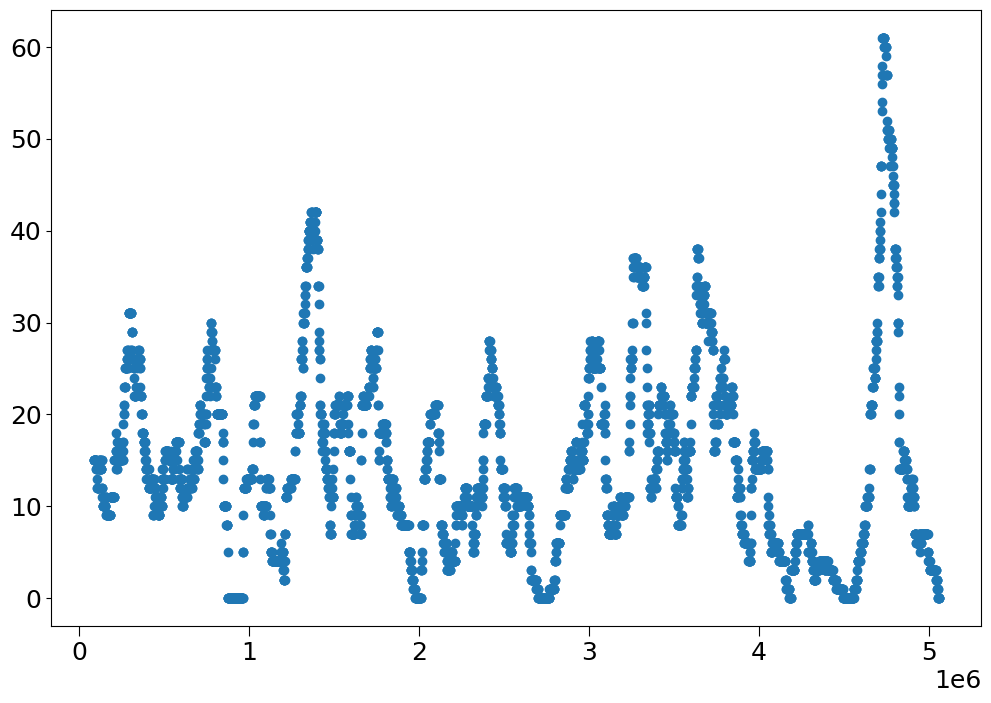

In [163]:
fig,ax = plt.subplots(figsize=(12,8))

ax.scatter(midpoints,num_transfers.values)

#ax.scatter(midpoints[pass_idxs],num_transfers_pass.values,color="red")


In [164]:
transfer_rate = num_transfers.values/(num_transfers.index.get_level_values("end") - num_transfers.index.get_level_values("start"))

transfer_rate = pd.Series(transfer_rate,index=num_transfers.index)

# transfer_rate_pass = transfer_rate.iloc[pass_idxs]
# transfer_rate_fail = transfer_rate.iloc[fail_idxs]


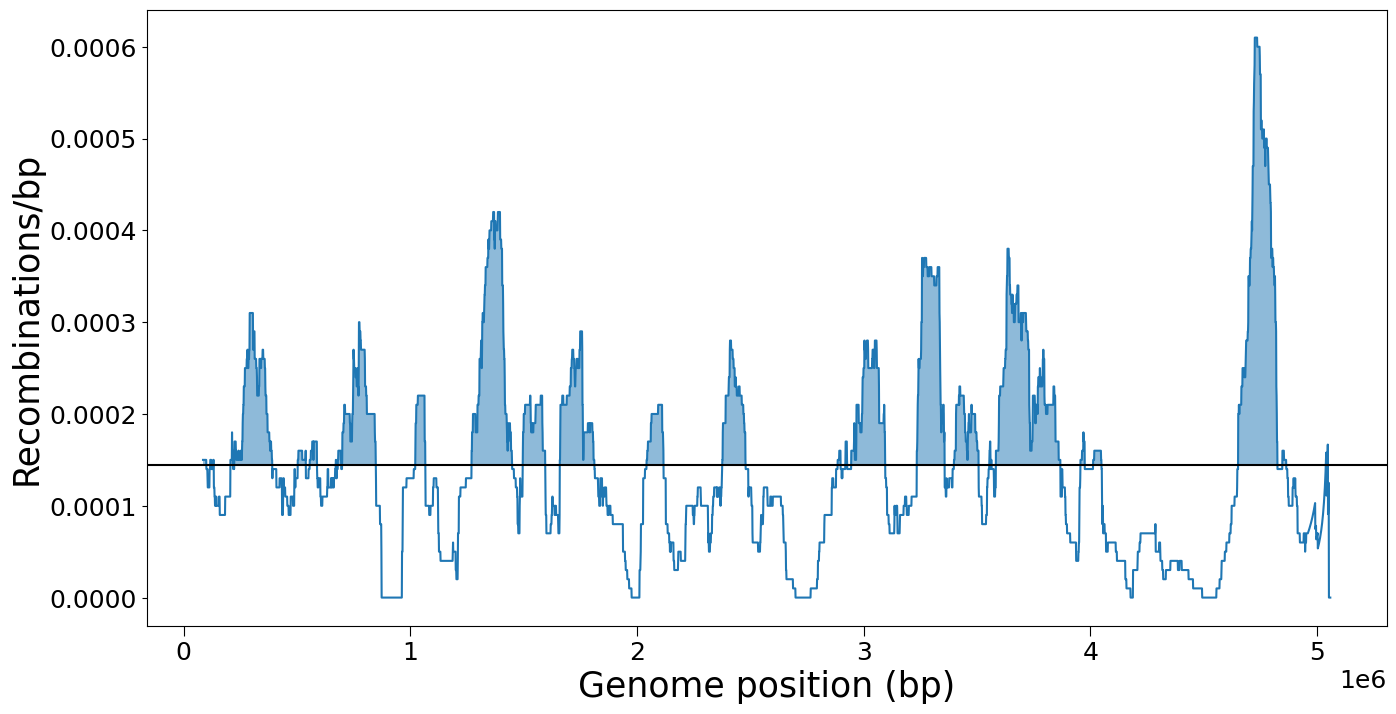

In [185]:
fig,ax = plt.subplots(figsize=(16,8))

ax.plot(midpoints,transfer_rate.values)

ax.set_ylabel("Recombinations/bp",size=25)

ax.set_xlabel("Genome position (bp)",size=25)

ax.axhline(transfer_rate.mean(),color="k")

ax.fill_between(midpoints,transfer_rate.mean(),transfer_rate,where=transfer_rate > transfer_rate.mean(),alpha=.5)


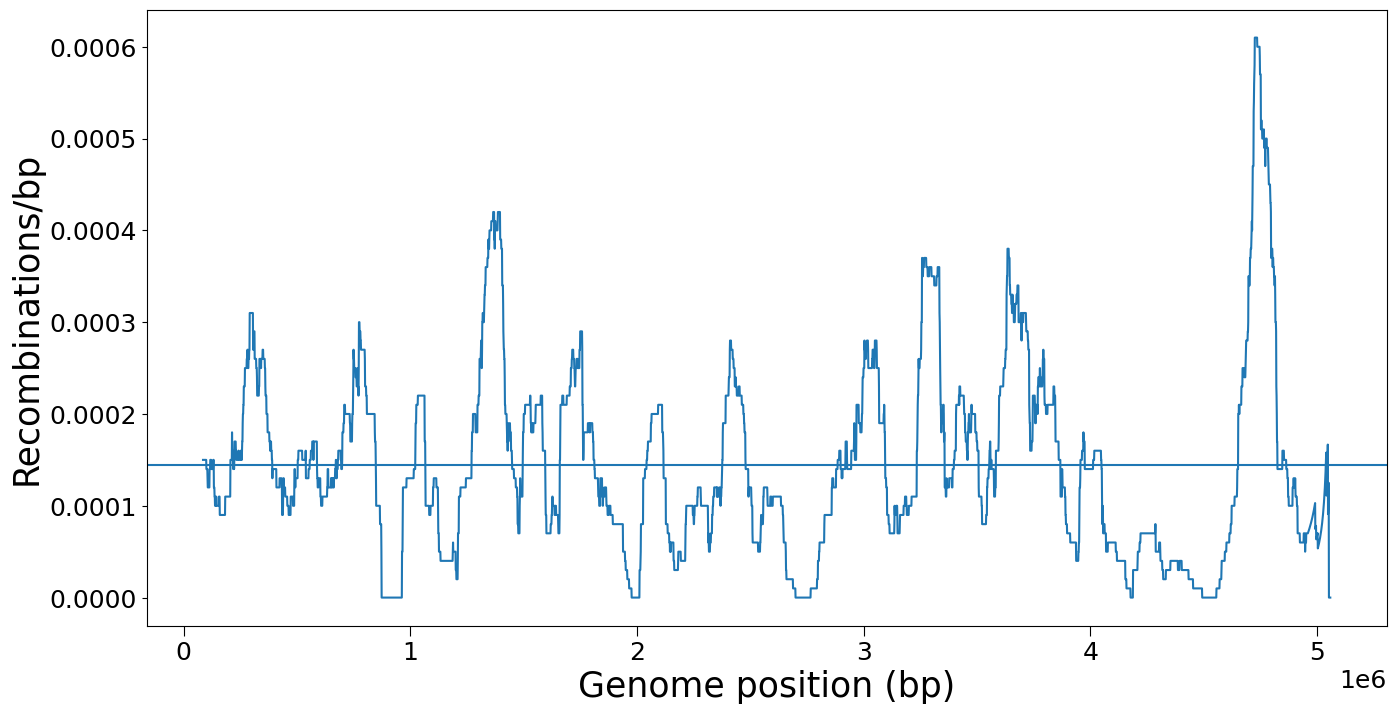

In [180]:
fig,ax = plt.subplots(figsize=(16,8))

ax.plot(midpoints,transfer_rate.values)

ax.set_ylabel("Recombinations/bp",size=25)

ax.set_xlabel("Genome position (bp)",size=25)

ax.axhline(transfer_rate.mean())



Text(0.5, 0, 'Genome position (bp)')

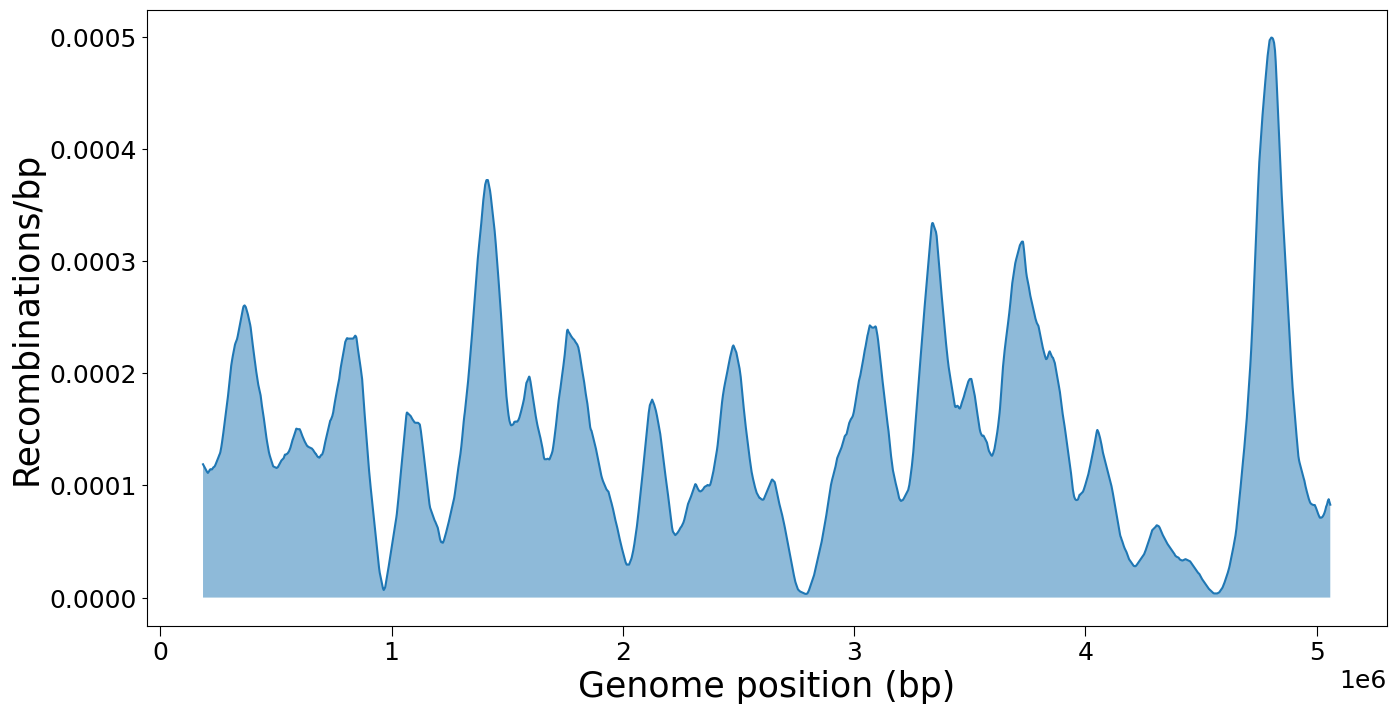

In [166]:
fig,ax = plt.subplots(figsize=(16,8))

ax.fill_between(midpoints,transfer_rate.rolling(100).mean(),alpha=.5)
ax.plot(midpoints,transfer_rate.rolling(100).mean())

ax.set_ylabel("Recombinations/bp",size=25)

ax.set_xlabel("Genome position (bp)",size=25)

#ax.set_ylim([1e-5,2*1e-3])

#ax.semilogy()

Text(0.5, 0, 'Recombination rate/bp')

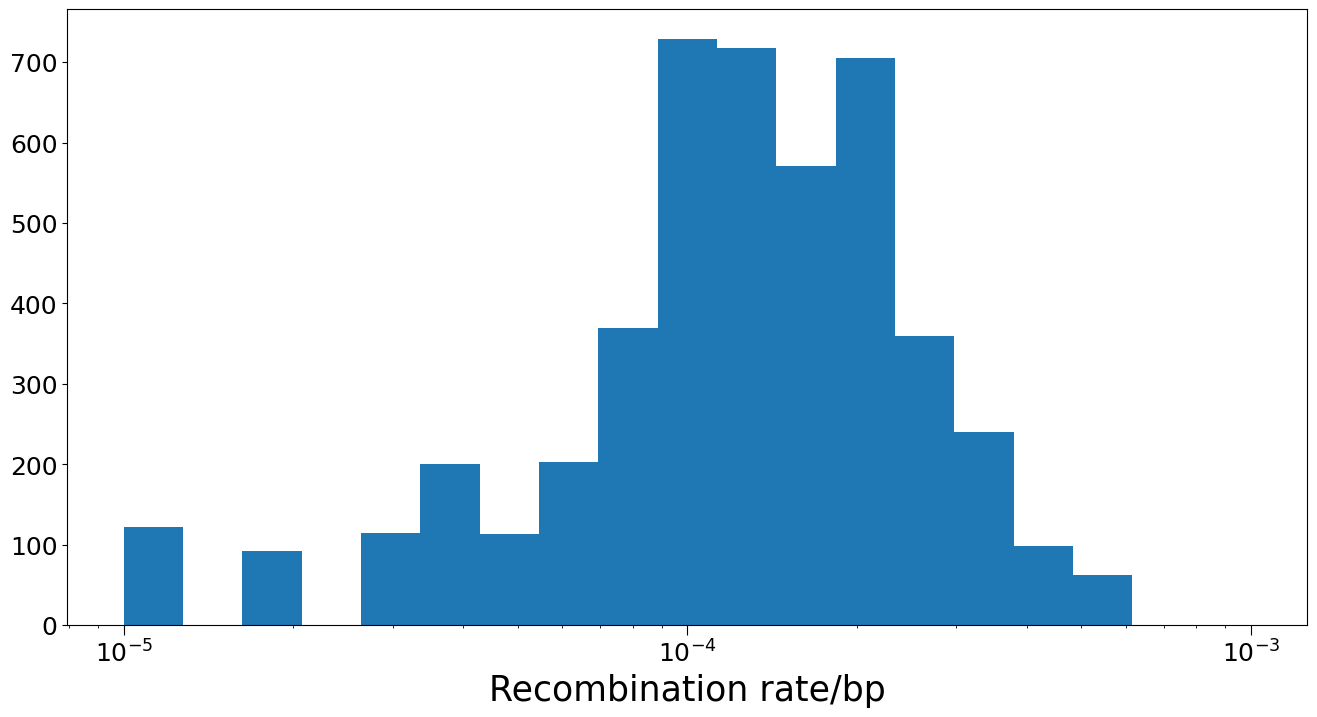

In [179]:
fig,ax = plt.subplots(figsize=(16,8))

bins = np.logspace(-5,-3,20)

ax.hist(transfer_rate.values,bins=bins)

ax.semilogx()

ax.set_xlabel("Recombination rate/bp",size=25)

Text(0.5, 0, 'Genome position (bp)')

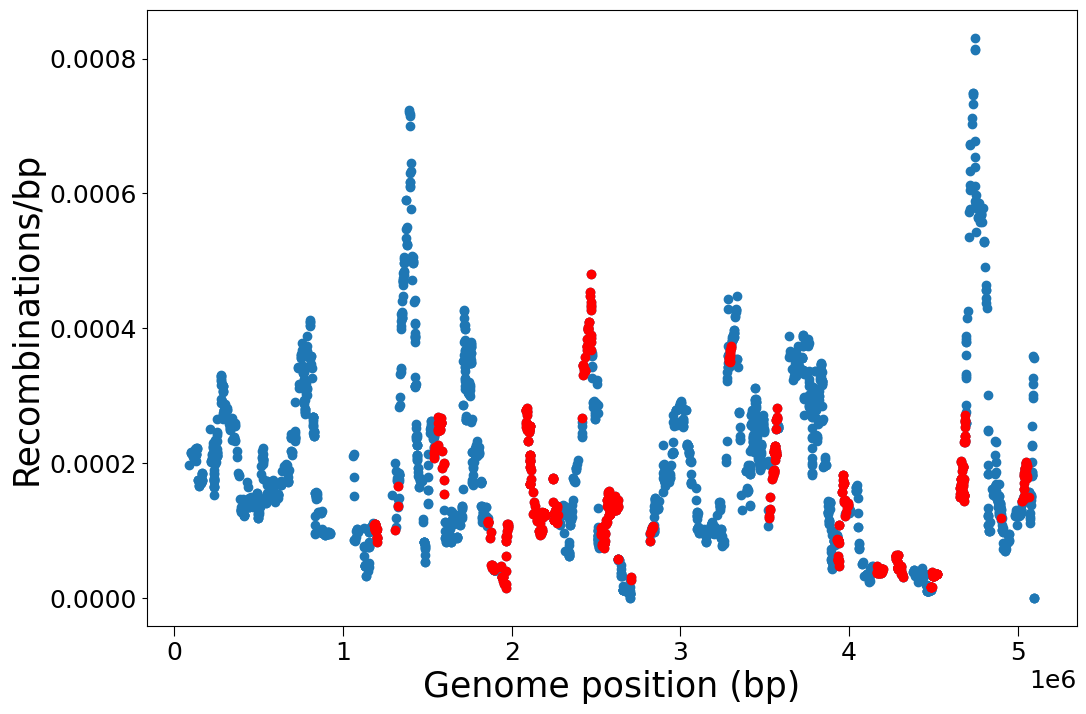

In [40]:
fig,ax = plt.subplots(figsize=(12,8))

ax.scatter(midpoints,transfer_rate.values)

ax.scatter(midpoints[pass_idxs],transfer_rate_pass.values,color="red")

ax.set_ylabel("Recombinations/bp",size=25)

ax.set_xlabel("Genome position (bp)",size=25)

In [99]:
df["transfer_rate"] = transfer_rate.values

ValueError: Length of values (49750) does not match length of index (2674)

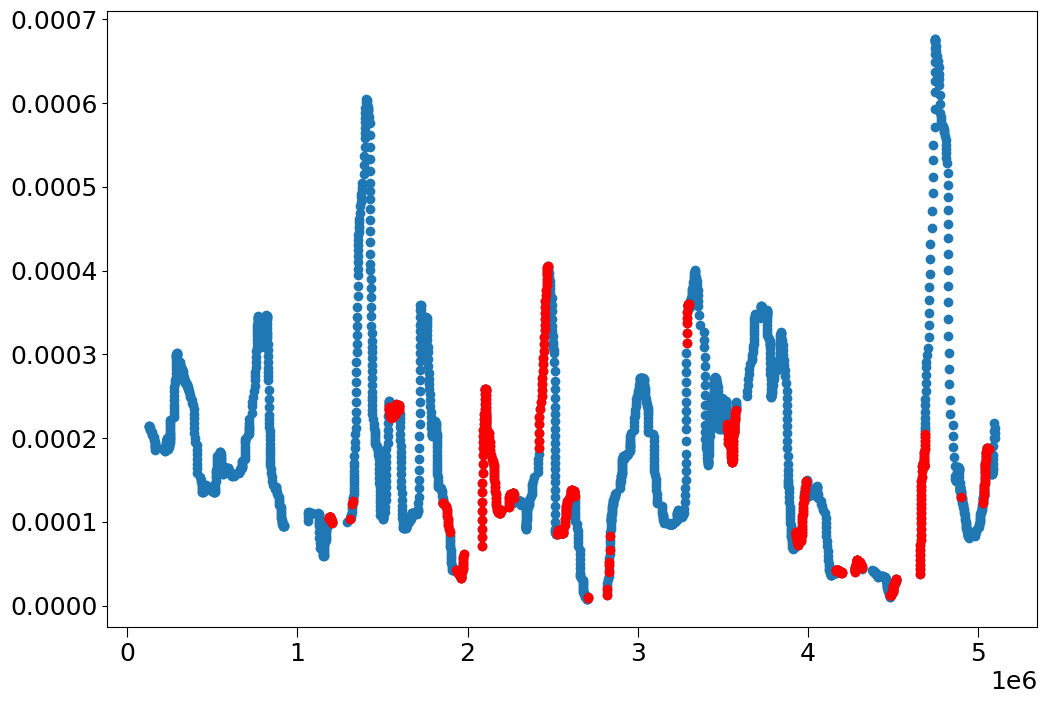

In [44]:
fig,ax = plt.subplots(figsize=(12,8))

ax.scatter(midpoints,df.transfer_rate.rolling(23).mean())

ax.scatter(midpoints[pass_idxs],df.transfer_rate.rolling(23).mean()[pass_idxs],color="red")


In [20]:
transfer_rate_pass.mean()

0.00033860400056470925

In [21]:
transfer_rate_fail.mean()

0.00034076633153243513

In [22]:
X = df[["rN_pval","transfer_rate"]].dropna()

In [23]:
df.columns

Index(['rN', 'rS', 'r', 'rN_pval', 'rAll_std', 'total_d', 'r_genomewide',
       'r_rescaled', 'rNrS', 'rNrS_rescaled', 'pval_gw', 'nonsyn_density',
       'window_bp_size', 'pval', 'ld_lb_int', 'pval_all',
       'multiplicative_pval', 'significance', 'h1', 'h12', 'h123', 'h2/h1',
       'pi', 'tajima', 'transfer_rate'],
      dtype='object')

[]

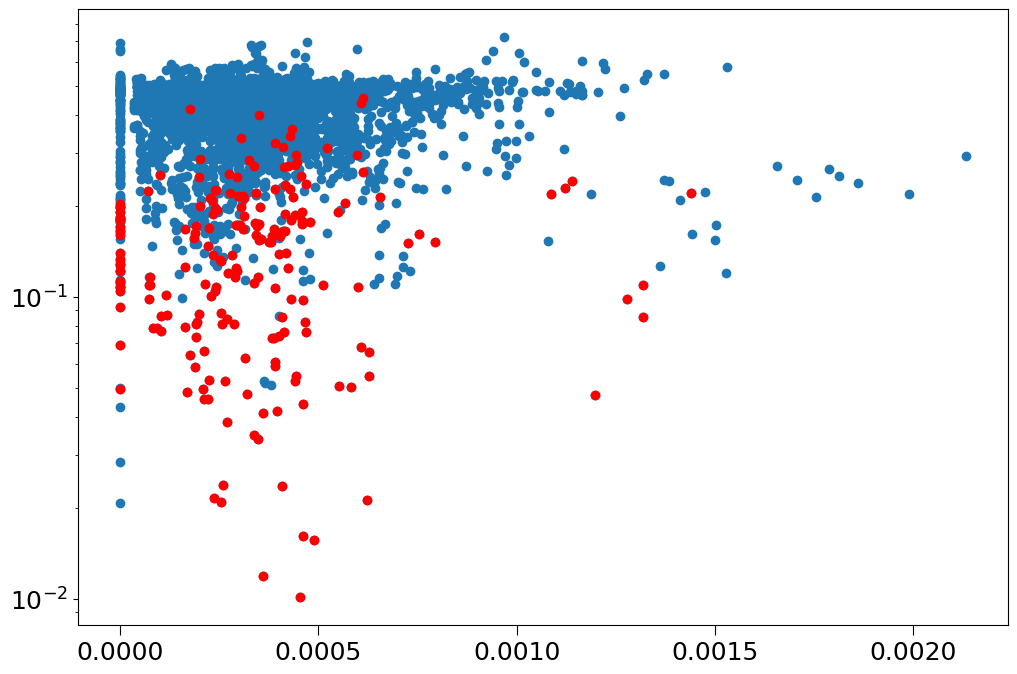

In [25]:
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(X.transfer_rate,X.rN_pval)
ax.scatter(X.transfer_rate[pass_idxs],X.rN_pval[pass_idxs],color="red")
ax.semilogy()

In [134]:
stats.linregress(X.transfer_rate,X.rN_pval)

LinregressResult(slope=7.756679116572515, intercept=0.3823818027115716, rvalue=0.0318163737116511, pvalue=0.08801743195760688, stderr=4.545292528804128, intercept_stderr=0.003398445002235281)

In [186]:
from scipy import integrate
import r2_utils
import haplotype_utils
import clade_utils
import networkx  as nx
from networkx.algorithms.components import connected_components
import pickle
from statistics import NormalDist
import core_gene_utils

In [188]:
clades = clade_utils.load_manual_clades(species,min_size=0)

focal_clade = 1
dfH_all = haplotype_utils.read_haplotypes(species,clades[focal_clade])
#dfH_all = haplotype_utils.read_haplotypes(species)

In [196]:
H = dfH_all.iloc[50000:100000]

In [197]:
H["700013672"].dropna()

contig     gene_id            site_pos  site_type
NC_009614  435590.9.peg.1005  1280829   syn          0.0
                              1280850   syn          0.0
                              1280859   syn          0.0
                              1280862   syn          0.0
                              1280871   syn          0.0
                                                    ... 
           435590.9.peg.1999  2511328   syn          0.0
                              2511346   syn          0.0
                              2511383   nonsyn       0.0
                              2511391   syn          0.0
                              2511413   nonsyn       0.0
Name: 700013672, Length: 42495, dtype: float64